## 이상치를 찾아라

**데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오**
* 강의 영상 : https://youtu.be/ipBW5D_UJEo
* 데이터셋 : titanic

## My Code

In [1]:
# 라이브러리 및 데이터 불러오기
import pandas as pd

df = pd.read_csv('../dataset/titanic/train.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-4bcpvpx6 because the default path (/config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


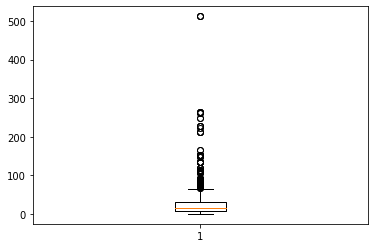

In [2]:
# 간단한 탐색적 데이터 분석 (EDA)
import matplotlib.pyplot as plt

plt.boxplot(df['Fare'], whis=1.5)
plt.show()

In [3]:
# IQR 구하기
q1 = df['Fare'].quantile(.25)
q3 = df['Fare'].quantile(.75)
iqr = q3 - q1
iqr

23.0896

In [4]:
# 이상치 데이터 구하기
min_out = q1 - iqr * 1.5
max_out = q3 + iqr * 1.5

outlier = df[(df['Fare'] < min_out)|(df['Fare'] > max_out)]
outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 1 to 879
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  116 non-null    int64  
 1   Survived     116 non-null    int64  
 2   Pclass       116 non-null    int64  
 3   Name         116 non-null    object 
 4   Sex          116 non-null    object 
 5   Age          101 non-null    float64
 6   SibSp        116 non-null    int64  
 7   Parch        116 non-null    int64  
 8   Ticket       116 non-null    object 
 9   Fare         116 non-null    float64
 10  Cabin        90 non-null     object 
 11  Embarked     114 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 11.8+ KB


In [5]:
# 이상치 데이터에서 여성 수 구하기, 출력하기 print()
print(sum(outlier['Sex'] == 'female'))

70


### Hint

In [6]:
# IQR 구하기
# pandas 활용
# Q1 = df[col].quantile(.25)
# Q3 = df[col].quantile(.75)

# numpy 활용
# Q1 = np.percentile(df[col], 25)
# Q3 = np.percentile(df[col], 75)

# IQR = Q3 - Q1
# Q1 - 1.5 * IQR, Q3 + 1.5 * IQR